# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Since the data is so highly skewed (non-standard), the mean and standard deviation do not give a clear picture of the data at all. It would be impossible to visualize or estimate the shape of the data based on those statistics.

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

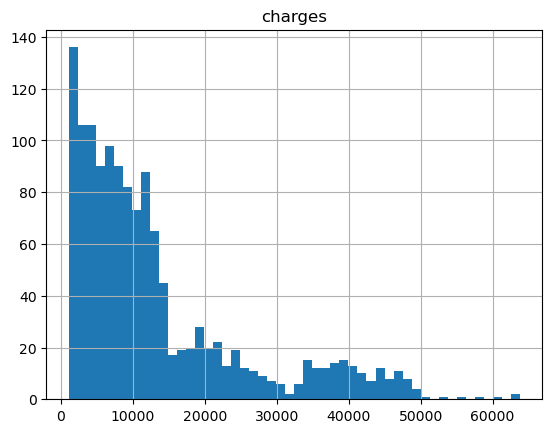

In [8]:
medical.hist('charges', bins=50)

In [13]:
mean = np.mean(medical['charges'])
std = np.std(medical['charges'], ddof=1)

print("Mean: "+str(round(mean, 2)))
print("Std:  "+str(round(std, 2)))

Mean: 13270.42
Std:  12110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

The sample size seems large enough to (in combination with the assumption of random sampling) justify the use of these statistics to make reasonable assumptions about population parameters. The sample size also seems large enough for a z-score.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Since we are concerned with the question of whether a population parameter is ABOVE a certain value, not whether it is simply close to or far away from a certain value, a one-sided test is appropriate.

In [20]:
def new_charges_sample(n) :
    return np.random.choice(medical['charges'], n)

In [59]:
results_list = []

for i in range(1000) :
    sample = new_charges_sample(1000)
    results_list.append(np.mean(sample))

print("Mean: "+str(np.mean(results_list)))
print("Std:  "+str(np.std(results_list, ddof=1)))

Mean: 13274.798022578207
Std:  388.00079531493515


In [60]:
series = pd.Series(results_list)

series.quantile(0.05)

# After taking 1000 samples, each with size 1000, the lower 0.05 quantile of sample means
# is still above 12,000, leading to 95% confidence that the administrator's fears have 
# not yet become reality. We're not far off, though.

12665.451570862499

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

The null hypothesis is that the means of the two groups will be the same, or not significantly different.

We are assuming that the variance of the two groups is similar enough to warrant comparison.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [68]:
# Manual 1: Define some functions to handle the equations.

def sp(n_zero, s_zero, n_one, s_one) :
    return np.sqrt(
        ((n_zero-1)*(s_zero**2) + (n_one-1)*(s_one**2)) / (n_zero + n_one - 2) 
    )

def t_stat(mean_zero, n_zero, mean_one, n_one, sp) :
    return (mean_zero - mean_one) / (sp * np.sqrt((1/n_zero)+(1/n_one)))

In [70]:
# Manually #2: Find our values and use the functions defined above.

insured_charges = medical[medical['insuranceclaim'] == 1]['charges']
uninsured_charges = medical[medical['insuranceclaim'] == 0]['charges']

insured_mean = np.mean(insured_charges)
uninsured_mean = np.mean(uninsured_charges)

insured_std = np.std(insured_charges, ddof=1)
uninsured_std = np.std(uninsured_charges, ddof=1)

sp = sp(len(insured_charges), insured_std, len(uninsured_charges), uninsured_std)
t_stat = t_stat(insured_mean, len(insured_charges), uninsured_mean, len(uninsured_charges), sp)

print(t_stat)

11.893299030876715


In [76]:
# Automatic: just tell scipy to do it.

t_stat, p_val = scipy.stats.ttest_ind(insured_charges, uninsured_charges)

print("T-stat:  "+str(t_stat))
print("P value: "+str(p_val))

T-stat:  11.893299030876712
P value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

While there isn't a function designed to do the entire test at once, there are useful functions like zscore() that can make the process much easier than doing it all by hand.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test